# 11. 연산자 끼워넣기
[문제 링크](https://www.acmicpc.net/problem/14888)

In [10]:
from collections import deque

def plus(a, b):
    return a + b

def minus(a, b):
    return a - b

def multiple(a, b):
    return a * b

def divide(a, b):
    # 둘중 하나만 음수일 때
    if (a > 0) ^ (b > 0):
        return -(a // -b)
    else:
        return a // b

# 결과룰 저장할 세트
results_set = set()
# 사칙연산 함수를 리스트에 저장
oper = [plus, minus, multiple, divide]

# 연산 재귀 함수
def calculate(nums_qu : deque, opers_count : int):
    global results_set, oper
    
    # 넘겨받은 숫자 큐의 길이가 1이면
    if len(nums_qu) == 1:
        # 결과를 저장하고 리턴
        results_set.add(nums_qu[0])
        return
    
    # 사칙연산을 수행
    for i in range(4):
        # 값 복사 시행
        n_q, o_c = deque(nums_qu), list(opers_count)
        # 해당 연산이 없으면 다음 연산자로 넘어감
        if o_c[i] == 0: continue
        # 연산자를 문자열에 추가
        o_c[i] -= 1
        # 연산 수행
        n_q[0] = oper[i](n_q.popleft(), n_q[0])
        # 재귀 함수 호출
        calculate(n_q, o_c)

# 숫자의 개수
n = int(input())
# 숫자 입력
nums = list(map(int, input().split()))
# 사칙연산의 갯수 입력
opers_count = list(map(int, input().split()))
# 연산 수행
calculate(deque(nums), opers_count)
# 결과 출력
print(max(results_set))
print(min(results_set))

30
30


## 성공
- 연산자를 리스트에 넣어 반복을 용이하게 만듬.
- 재귀를 이용해 완전탐색 시행.
    - 참조 복사로 인해 이전 상태를 잃어버리지 않도록 값 복사를 하게함.
- set을 이용해 결과들을 저장.
- queue를 이용해 숫자 순서대로 연산을 수행.

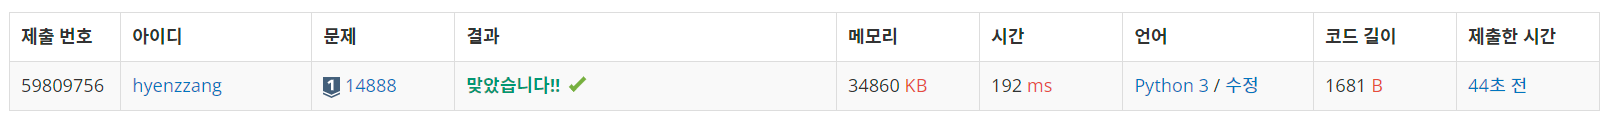

# 12. 체스판 다시 칠하기
[문제 링크](https://www.acmicpc.net/problem/1018)

In [ ]:
# 행, 열 입력받기
row, col = map(int, input().split())
# 보드 입력받기
full_bord= []

def check_bord(x, y):
    painted_count = 0
    for i in range(8):
        for j in range(8):
            # 해당 위치의 색이 다르면 칠해야하는 칸의 수를 증가
            # ^ = XOR 연산자, 둘이 다르면 1, 같으면 0
            if full_bord[x+i][y+j] ^ ((i + j) % 2):
                painted_count += 1
    # 칠해야하는 칸의 수를 반환 (반대의 경우 칠해야하는 칸의 수가 더 작을 수도 있음)
    return min(painted_count, 64 - painted_count)

for _ in range(row):
    line = input()
    # W는 0, B는 1로 변환
    l = [ 0 if s == 'W' else 1 for s in line]
    full_bord.append(l)

# 8x8 보드를 만들기 위해 확인해 봐야할 행, 열의 수
row -= 7
col -= 7
results =[]
for x in range(row):
    for y in range(col):
        result = check_bord(x, y)
        # 결과를 저장
        results.append(result)
# 최소값 출력
print(min(results))

## 성공
- 완전탐색. -> 체크해야할 시작 좌표 범위를 설정.
- 흑백 반전의 경우, 64 - 결과
- 흑은 1 백은 0으로 설정하고 xor연산 사용 

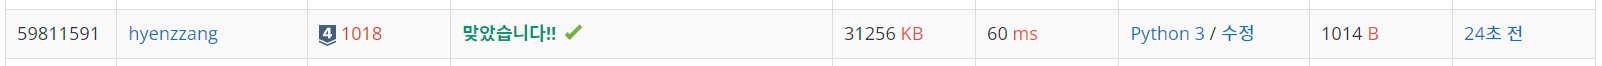

# 13. 숫자 카드 2
[문제 링크](https://www.acmicpc.net/problem/10816)

In [ ]:
n = int(input())
cards = list(map(int, input().split()))
m= int(input())
finds = list(map(int, input().split()))

card_dict = {}
# 카드의 이름별로 갯수를 저장
for card in cards:
    try:
        card_dict[card] += 1
    except:
        card_dict[card] = 1
# 찾는 카드의 갯수를 출력
for card in finds:
    try:
        print(card_dict[card], end=' ')
    except:
        print(0, end=' ')

## 성공
- 이진탐색을 사용하지 않은 풀이.
- key - value쌍을 통한 빠른 접근을 통해 풀이.
- 이진 탐색을 어떤 식으로 활용해야 할 지 감이 잡히지 않음.

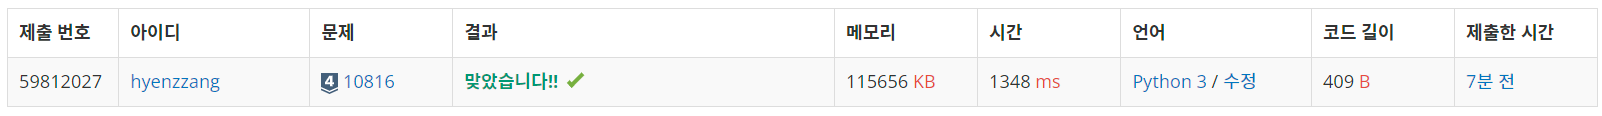

In [ ]:
n = int(input())
cards = list(map(int, input().split()))
m= int(input())
finds = list(map(int, input().split()))

# 카드의 이름별로 갯수를 저장할 리스트
# 음수는 뒤쪽부터 저장됨
card_list = [0] * 20000001
# 카드의 이름별로 갯수를 저장
for card in cards:
    card_list[card] += 1
    
# 찾는 카드의 갯수를 출력
for card in finds:
    print(card_list[card], end=' ')

## 성공
- 이진탐색을 사용하지 않은 풀이 2.
- 파이썬의 음수 인덱스를 통한 접근을 이용.

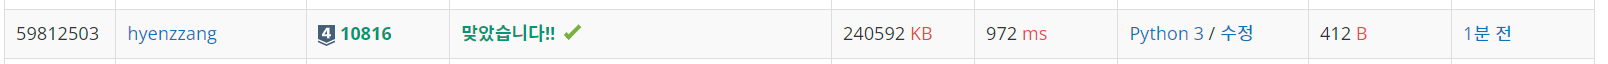

In [ ]:
n = int(input())
cards = list(map(int, input().split()))
m= int(input())
finds = list(map(int, input().split()))

In [22]:
n = 10
cards = list(map(int, '6 3 2 10 10 10 -10 -10 7 3'.split()))
m= 8
finds = list(map(int, '10 9 -5 2 3 4 5 -10'.split()))

In [23]:
# 값의 마지막 인덱스를 반환하는 이진탐색 함수
def binary_search_upper(target, start, end):
    global cards
    
    if start > end:
        return -1
    
    # 중간 인덱스
    mid = (start + end) // 2
    
    if target < cards[mid]:
        return binary_search_upper(target, start, mid - 1)
    elif target > cards[mid]:
        return binary_search_upper(target, mid + 1, end)
    elif target == cards[mid] and target == cards[mid+1]:
        return binary_search_upper(target, mid + 1, end)
    else:
        return mid

# 값의 첫번째 인덱스를 반환하는 이진탐색 함수
def binary_search_lower(target, start, end):
    global cards
    
    if start > end:
        return -1
    
    # 중간 인덱스    
    mid = (start + end) // 2
    
    if target < cards[mid]:
        return binary_search_upper(target, start, mid - 1)
    elif target > cards[mid]:
        return binary_search_upper(target, mid + 1, end)
    elif target == cards[mid] and target == cards[mid-1]:
        return binary_search_upper(target, start, mid - 1)
    else:
        return mid
    
for card in finds:
    start = binary_search_lower(card, 0, n-1)
    end = binary_search_upper(card, 0, n-1)
    if start == -1:
        print(0, end=' ')
    else:
        print(end - start + 1, end=' ')



0 0 0 0 1 0 0 0 

[0, 1, 2, 3]